Mount drive to import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
save_dir = '/content/drive/MyDrive/Refit_project/models/' # Adjust path as needed

# Create the directory if it doesn't exist (optional)
import os
os.makedirs(save_dir, exist_ok=True)

Import darts for TFT(Temporal Fusion Transformer)

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 74.6 MB/s eta 0:00:00


Loading the preprocessed data

In [ ]:
import joblib

# This code goes at the beginning of your MODELING notebook.

# Use the same path to load the scaler
scaler_path = '/content/drive/MyDrive/Refit_project/preprocessing/scaler.gz'

# Load the fitted scaler object
scaler = joblib.load(scaler_path)

print("Scaler loaded successfully.")

Scaler loaded successfully.


#Importing preprocessed data

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Refit_project/preprocessing/house1_processed.parquet'

#Load data
df_processed = pd.read_parquet(file_path)
df_processed.head()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,hour,dayofweek,month
Time,,,,,,,,,,,,,,
2013-10-09 13:00:00,0.000000,0.066201,0.014121,0.139356,0.018726,0.000000,0.0,0.0,0.0,0.000000,0.0005,0.565217,0.333333,0.818182
2013-10-09 14:00:00,0.000061,0.040419,0.002357,0.135018,0.351616,0.000000,0.0,0.0,0.0,0.000000,0.0005,0.608696,0.333333,0.818182
2013-10-09 15:00:00,0.000126,0.036223,0.030211,0.128372,0.312064,0.000000,0.0,0.0,0.0,0.000000,0.0005,0.652174,0.333333,0.818182
2013-10-09 16:00:00,0.000191,0.011249,0.000588,0.126824,0.081957,0.000000,0.0,0.0,0.0,0.000000,0.0005,0.695652,0.333333,0.818182
2013-10-09 17:00:00,0.000256,0.012427,0.031421,0.155780,0.302780,0.000018,0.0,0.0,0.0,0.764265,0.0005,0.739130,0.333333,0.818182


#Splitting data

In [ ]:
# Calculate the split point (80% of the data for training)
split_point = int(len(df_processed) * 0.8)

# Create train and test sets
train_data = df_processed.iloc[:split_point]
test_data = df_processed.iloc[split_point:]

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Training data goes from {train_data.index.min()} to {train_data.index.max()}")
print(f"Test data goes from {test_data.index.min()} to {test_data.index.max()}")

Training data shape: (12268, 14)
Test data shape: (3067, 14)
Training data goes from 2013-10-09 13:00:00 to 2015-03-04 16:00:00
Test data goes from 2015-03-04 17:00:00 to 2015-07-10 11:00:00


Adding weekend features

In [ ]:
# Add the new feature to both train and test sets
train_data['is_weekend'] = (train_data.index.dayofweek >= 5).astype(int)
test_data['is_weekend'] = (test_data.index.dayofweek >= 5).astype(int)

/tmp/ipython-input-2544050657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_weekend'] = (train_data.index.dayofweek >= 5).astype(int)
/tmp/ipython-input-2544050657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['is_weekend'] = (test_data.index.dayofweek >= 5).astype(int)


#Seasonal Naive Forecast

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

target_col = 'Aggregate'                                            #target column for prediction

seasonal_period = 24                                                #Daily pattern

naive_predictions = test_data[target_col].shift(seasonal_period)    #shifts data +24hrs for test set

# Drop the initial NaN values created by the shift
valid_actuals = test_data[target_col][seasonal_period:]             #actual value from 25th hour
valid_predictions = naive_predictions.dropna()


In [ ]:
# Calculate error metrics
rmse_naive = np.sqrt(mean_squared_error(valid_actuals, valid_predictions))
mae_naive = mean_absolute_error(valid_actuals, valid_predictions)

print(f"Naive Forecast - RMSE: {rmse_naive:.2f}")
print(f"Naive Forecast - MAE: {mae_naive:.2f}")


Naive Forecast - RMSE: 0.03
Naive Forecast - MAE: 0.01


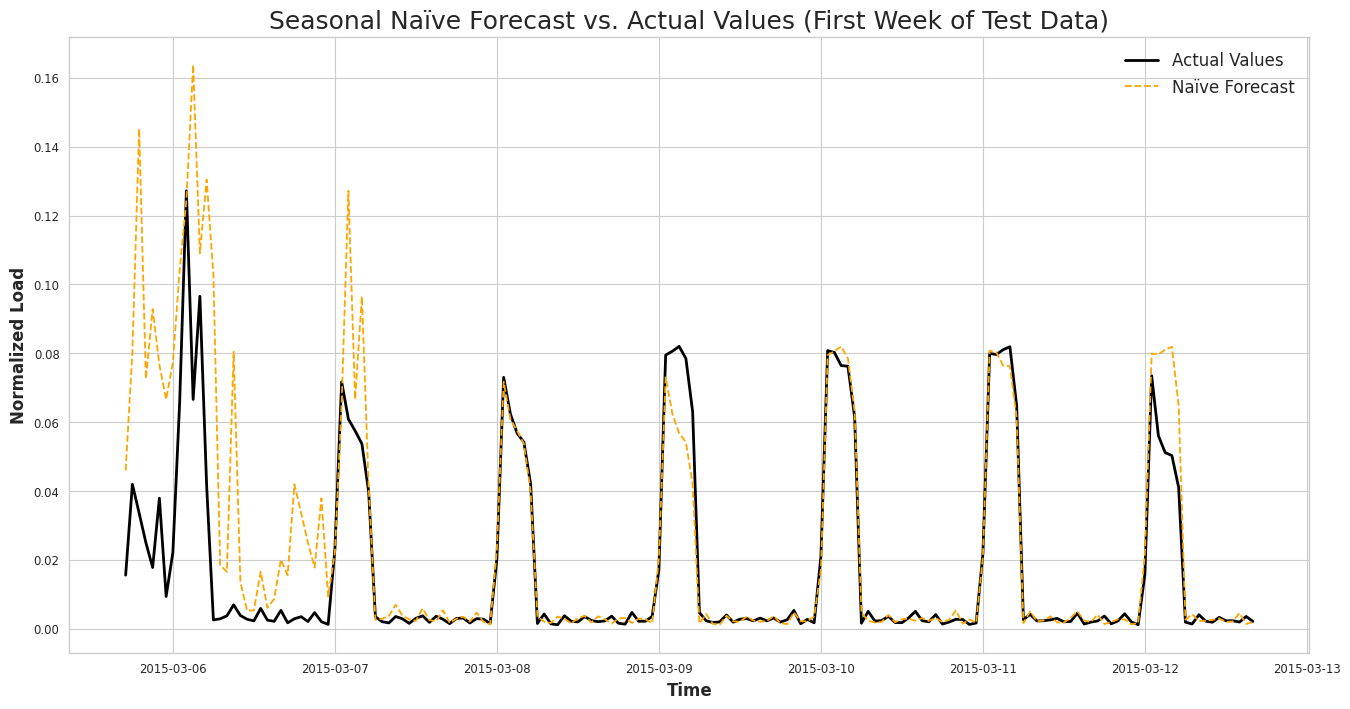

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 8)

# Select a slice of the data to plot (e.g., the first week = 24 * 7 = 168 hours)
plot_slice = 168

plt.plot(valid_actuals.index[:plot_slice], valid_actuals[:plot_slice],
         label='Actual Values', color='black', linewidth=2)

plt.plot(valid_predictions.index[:plot_slice], valid_predictions[:plot_slice],
         label='Naïve Forecast', color='orange', linestyle='--')

plt.title('Seasonal Naïve Forecast vs. Actual Values (First Week of Test Data)', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Load', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#SARIMAX


--- SARIMA Forecast ---
Fitting SARIMA model... (This may take several minutes)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



SARIMA Model Fitted.
RMSE: 0.1179
MAE: 0.1074


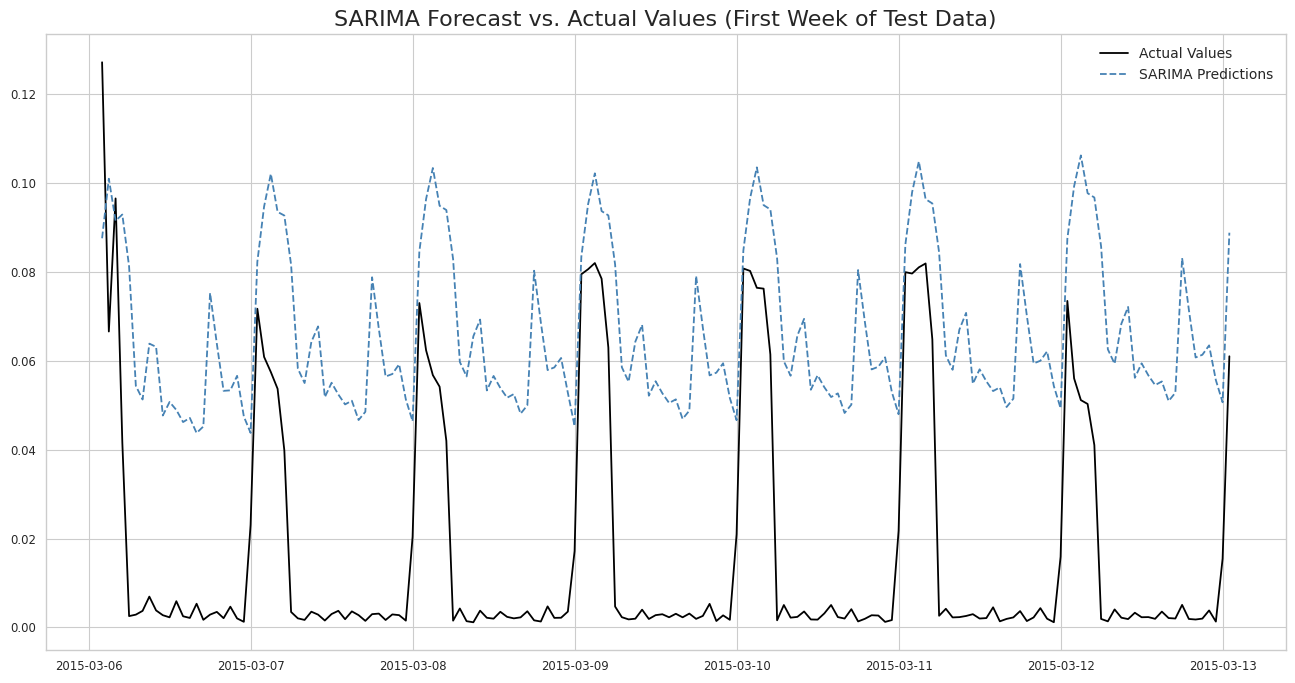

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA requires defining the model's order (p,d,q) and seasonal order (P,D,Q,s)
# These are common starting points for hourly data with daily seasonality (s=24)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

print("\n--- SARIMA Forecast ---")
print("Fitting SARIMA model... (This may take several minutes)")

# We use the 'exog' argument to include our time-based features
exog_cols = ['hour', 'dayofweek', 'month', 'is_weekend']

#fitting the model
sarima_model = SARIMAX(train_data[target_col],
                       exog=train_data[exog_cols],
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit(disp=False)

# Make predictions on the test set
# We need to provide the future exogenous variables
sarima_predictions = sarima_results.predict(start=test_data.index[0],
                                            end=test_data.index[-1],
                                            exog=test_data[exog_cols],
                                            )
# Calculate error metrics
rmse_sarima = np.sqrt(mean_squared_error(test_data[target_col], sarima_predictions))
mae_sarima = mean_absolute_error(test_data[target_col], sarima_predictions)


print("\nSARIMA Model Fitted.")
print(f"RMSE: {rmse_sarima:.4f}")
print(f"MAE: {mae_sarima:.4f}")
sarima_results.save(os.path.join(save_dir, "sarima_model.pkl"))
# Visualize the results for the first few days of the test set
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[:168], test_data[target_col][:168], label='Actual Values', color='black')
plt.plot(test_data.index[:168], sarima_predictions[:168], label='SARIMA Predictions', color='steelblue', linestyle='--')
plt.title('SARIMA Forecast vs. Actual Values (First Week of Test Data)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

#LightGBM

--- Data Prepared for LightGBM ---

--- Training LightGBM Model ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 12133, number of used features: 7
[LightGBM] [Info] Start training from score 0.027868
Model training complete.

--- Evaluating LightGBM Model ---
RMSE: 0.0190
MAE: 0.0108


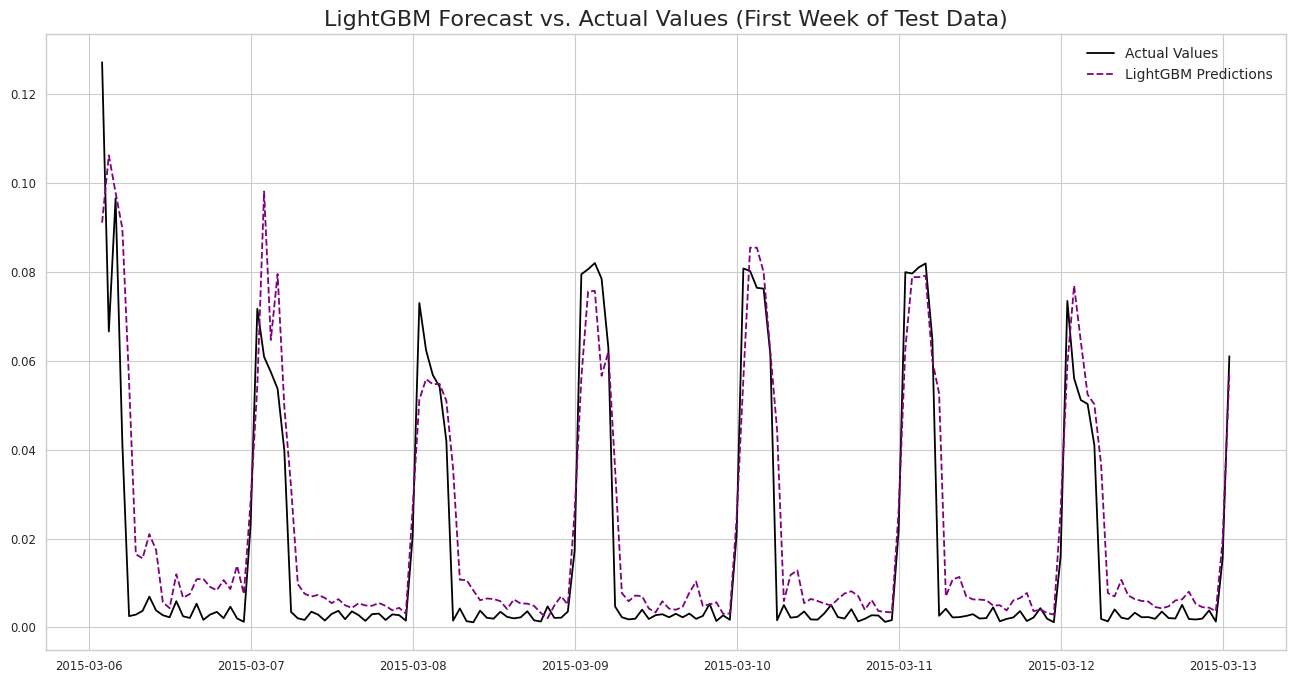

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- 1. Prepare Data for Machine Learning ---
# We need to explicitly define our features (X) and target (y)
# This code should be run after your preprocessing pipeline is complete,
# but before you split the data into train_data and test_data.

# Create a 1-hour lag feature
df_processed['lag_1hr'] = df_processed['Aggregate'].shift(1)

# Create a 24-hour lag (daily seasonality)
df_processed['lag_24hr'] = df_processed['Aggregate'].shift(24)

# Create a 1-week lag (weekly seasonality)
df_processed['lag_168hr'] = df_processed['Aggregate'].shift(168)

#Create is_weekend
df_processed['is_weekend'] = (df_processed.index.dayofweek >= 5).astype(int)

# The shift operation creates NaN values at the beginning of the dataset
# We must drop these rows as they cannot be used for training.
df_processed.dropna(inplace=True)
split_point = int(len(df_processed) * 0.8)

train_data = df_processed.iloc[:split_point]
test_data = df_processed.iloc[split_point:]


# Define the features and target for both train and test sets
features = ['hour', 'dayofweek', 'month', 'is_weekend', 'lag_1hr', 'lag_24hr', 'lag_168hr']
target = 'Aggregate'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

print("--- Data Prepared for LightGBM ---")


# --- 2. Train the LightGBM Model ---
print("\n--- Training LightGBM Model ---")

# Initialize the model. `random_state` is for reproducibility.
lgb_model = lgb.LGBMRegressor(random_state=42)

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

print("Model training complete.")


# --- 3. Make Predictions and Evaluate ---
print("\n--- Evaluating LightGBM Model ---")

# Predict on the test set
lgb_predictions = lgb_model.predict(X_test)



# Calculate error metrics
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_predictions))
mae_lgb = mean_absolute_error(y_test, lgb_predictions)

print(f"RMSE: {rmse_lgb:.4f}")
print(f"MAE: {mae_lgb:.4f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[:168], y_test[:168], label='Actual Values', color='black')
plt.plot(test_data.index[:168], lgb_predictions[:168], label='LightGBM Predictions', color='purple', linestyle='--')
plt.title('LightGBM Forecast vs. Actual Values (First Week of Test Data)', fontsize=16)
plt.legend()
plt.show()

In [ ]:
df_processed.head(10)

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,hour,dayofweek,month,lag_1hr,lag_24hr,lag_168hr,is_weekend
Time,,,,,,,,,,,,,,,,,,
2013-10-16 13:00:00,0.010954,0.008303,0.000000,0.125298,0.335238,0.0,0.0,0.0,0.0,0.0,0.0005,0.565217,0.333333,0.818182,0.007774,0.033082,0.066201,0
2013-10-16 14:00:00,0.011018,0.043911,0.027924,0.106479,0.113926,0.0,0.0,0.0,0.0,0.0,0.0005,0.608696,0.333333,0.818182,0.008303,0.053195,0.040419,0
2013-10-16 15:00:00,0.011083,0.034266,0.000000,0.104826,0.181592,0.0,0.0,0.0,0.0,0.0,0.0005,0.652174,0.333333,0.818182,0.043911,0.063183,0.036223,0
2013-10-16 16:00:00,0.011148,0.009146,0.000000,0.128242,0.299342,0.0,0.0,0.0,0.0,0.0,0.0005,0.695652,0.333333,0.818182,0.034266,0.007251,0.011249,0
2013-10-16 17:00:00,0.011213,0.004397,0.027218,0.104833,0.117692,0.0,0.0,0.0,0.0,0.0,0.0005,0.739130,0.333333,0.818182,0.009146,0.003705,0.012427,0
2013-10-16 18:00:00,0.011279,0.003484,0.000000,0.100777,0.168764,0.0,0.0,0.0,0.0,0.0,0.0005,0.782609,0.333333,0.818182,0.004397,0.003692,0.017457,0
2013-10-16 19:00:00,0.011344,0.003630,0.000000,0.101883,0.289228,0.0,0.0,0.0,0.0,0.0,0.0005,0.826087,0.333333,0.818182,0.003484,0.003660,0.015960,0
2013-10-16 20:00:00,0.011408,0.004088,0.021845,0.107698,0.110422,0.0,0.0,0.0,0.0,0.0,0.0005,0.869565,0.333333,0.818182,0.003630,0.003709,0.015913,0
2013-10-16 21:00:00,0.011474,0.003619,0.003350,0.107073,0.165375,0.0,0.0,0.0,0.0,0.0,0.0005,0.913043,0.333333,0.818182,0.004088,0.003783,0.048372,0


#XGBoost

--- Using previously prepared data for XGBoost ---

--- Training XGBoost Model ---
Model training complete.

--- Evaluating XGBoost Model ---
RMSE: 0.0190
MAE: 0.0109


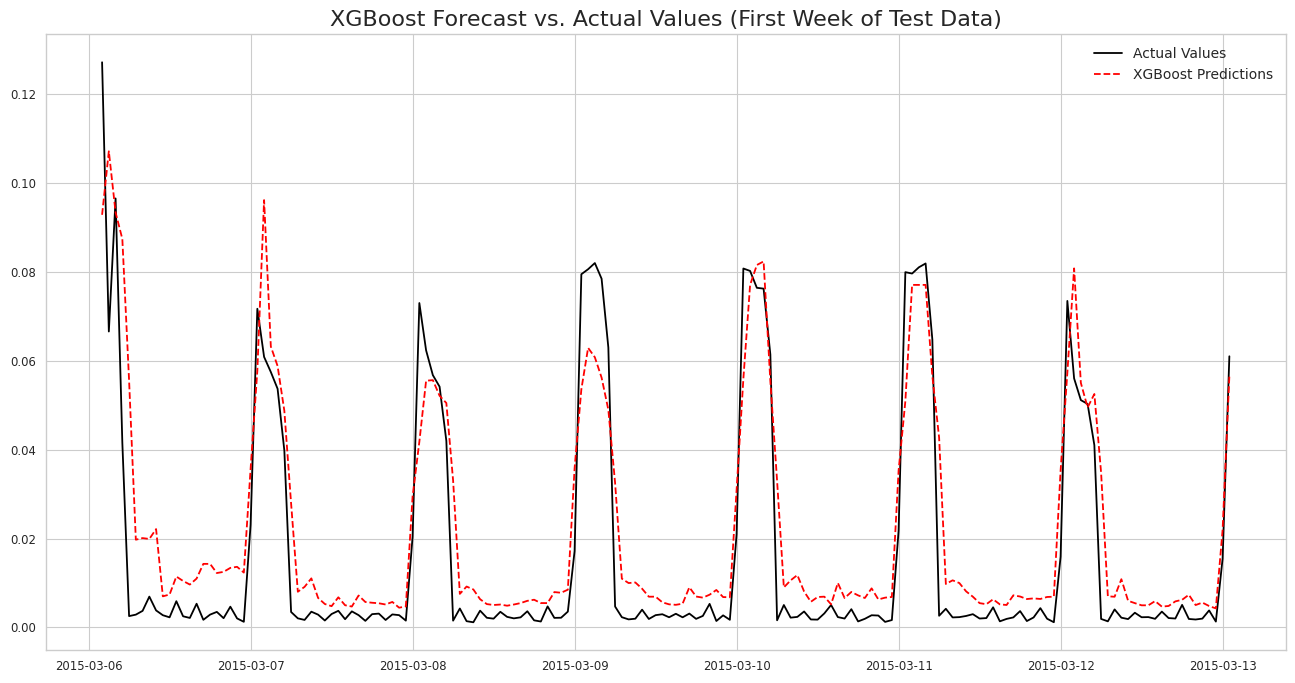

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Preparation ---
# This step is already complete. We will use the same X_train, y_train,
# X_test, and y_test sets from the previous step for lightgbm which include lag features.
print("--- Using previously prepared data for XGBoost ---")

# --- 2. Train the XGBoost Model ---
print("\n--- Training XGBoost Model ---")

# Initialize the model. We can add parameters for regularization.
# `early_stopping_rounds` is a best practice to prevent overfitting.
# It monitors the performance on a validation set (here, our test set)
# and stops training if the performance doesn't improve for 10 rounds.
xgb_model = xgb.XGBRegressor(n_estimators=1000, # Build 1000 trees
                             learning_rate=0.05,
                             early_stopping_rounds=10,
                             random_state=42)

# Fit the model. We provide an evaluation set for early stopping.
xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=False) # verbose=False keeps the output clean

print("Model training complete.")


# --- 3. Make Predictions and Evaluate ---
print("\n--- Evaluating XGBoost Model ---")

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate error metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[:168], y_test[:168], label='Actual Values', color='black')
plt.plot(test_data.index[:168], xgb_predictions[:168], label='XGBoost Predictions', color='red', linestyle='--')
plt.title('XGBoost Forecast vs. Actual Values (First Week of Test Data)', fontsize=16)
plt.legend()
plt.show()

#LSTM(Long Short Term Memory)

In [ ]:
import numpy as np

def create_sequences(data, lookback, horizon, target_col_index):
    """
    Transforms a time-series dataframe into supervised learning sequences.

    :param data: Input dataframe or numpy array.
    :param lookback: Number of previous time steps to use as input features.
    :param horizon: Number of future time steps to predict.
    :param target_col_index: The index of the column we are trying to predict.
    """
    X, y = [], []
    for i in range(len(data) - lookback - horizon + 1):
        feature_window = data[i:(i + lookback)]
        target_window = data[(i + lookback):(i + lookback + horizon), target_col_index]
        X.append(feature_window)
        y.append(target_window)
    return np.array(X), np.array(y)

# --- Define Parameters ---
# We'll use the last 48 hours of data to predict the next hour.
LOOKBACK = 48
HORIZON = 1

# Your preprocessed DataFrame 'df_processed' should have all features
# Ensure the 'Aggregate' column is the first column for easy indexing
target_col_name = 'Aggregate'
feature_cols = [col for col in df_processed.columns if col != target_col_name]
df_lstm = df_processed[[target_col_name] + feature_cols]

# Split data before creating sequences
train_df = df_lstm.iloc[:split_point]
test_df = df_lstm.iloc[split_point:]

# Create sequences from the training and testing data
# We convert to numpy arrays for efficiency
X_train, y_train = create_sequences(train_df.values, LOOKBACK, HORIZON, 0)
X_test, y_test = create_sequences(test_df.values, LOOKBACK, HORIZON, 0)

print("--- Data prepared for LSTM ---")
print(f"X_train shape: {X_train.shape}") # (samples, timesteps, features)
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

--- Data prepared for LSTM ---
X_train shape: (12085, 48, 18)
y_train shape: (12085, 1)
X_test shape: (2986, 48, 18)
y_test shape: (2986, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Define the Model Architecture ---
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(LOOKBACK, X_train.shape[2])))
model.add(Dropout(0.2))         # Dropout for regularization

# Second LSTM layer
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=HORIZON))


# --- Compile the Model ---
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

# --- Train the Model ---
# We use EarlyStopping to prevent overfitting. It stops training when the
# validation loss stops improving.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\n--- Training LSTM Model ---")
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

print("Model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 48, 100)        │        47,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 48, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,851 (304.11 KB)

 Trainable params: 77,851 (304.11 KB)

 Non-trainable params: 0 (0.00 B)


--- Training LSTM Model ---
Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0222 - val_loss: 0.0149
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0178 - val_loss: 0.0161
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0167 - val_loss: 0.0142
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0154 - val_loss: 0.0161
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0149 - val_loss: 0.0139
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0147 - val_loss: 0.0131
Epoch 8/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0146 - val_loss: 0.0133
Epoch 9/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 10/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0142 - val_loss: 0.0146
Epoch 11/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0142 - val_loss: 0.0133
Epoch 12/50

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

--- Evaluating LSTM Model (on original scale) ---
RMSE: 542.0989
MAE: 313.0369


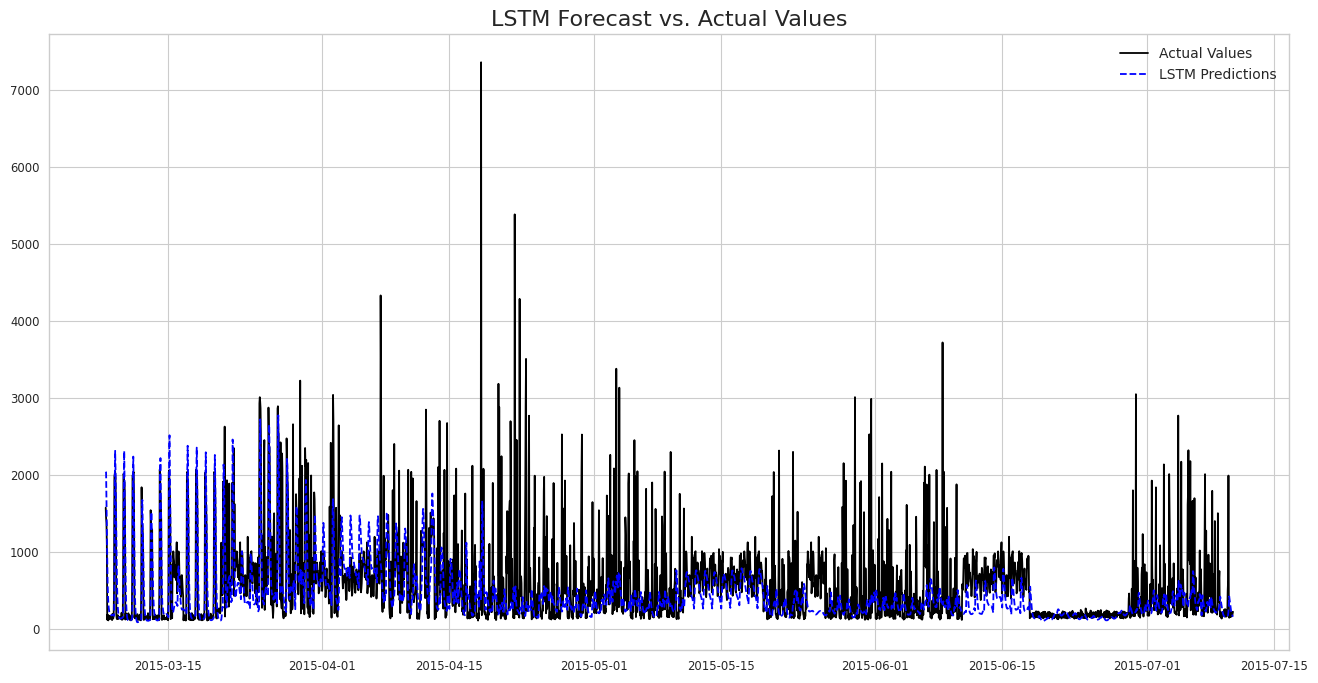

In [ ]:
# --- Make Predictions ---
lstm_predictions_scaled = model.predict(X_test)

# Find out how many features the scaler was originally fitted on
n_scaler_features = scaler.n_features_in_ # This will likely be 10

# Create a dummy array with the CORRECT shape that the scaler expects
dummy_array_preds = np.zeros((len(lstm_predictions_scaled), n_scaler_features))
# Place the scaled predictions into the first column (the 'Aggregate' column's position)
dummy_array_preds[:, 0] = lstm_predictions_scaled.flatten()
# Now, inverse_transform this correctly shaped array
lstm_predictions = scaler.inverse_transform(dummy_array_preds)[:, 0]


# Do the same for the actual test values (y_test) to get them on the original scale
dummy_array_actuals = np.zeros((len(y_test), n_scaler_features))
dummy_array_actuals[:, 0] = y_test.flatten()
y_test_inversed = scaler.inverse_transform(dummy_array_actuals)[:, 0]


# --- Evaluate ---
rmse_lstm = np.sqrt(mean_squared_error(y_test_inversed, lstm_predictions))
mae_lstm = mean_absolute_error(y_test_inversed, lstm_predictions)

print("\n--- Evaluating LSTM Model (on original scale) ---")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")


# --- Visualize ---
plt.figure(figsize=(16, 8))
# We need to align the test actuals with the predictions
plt.plot(test_df.index[LOOKBACK+HORIZON-1:], y_test_inversed, label='Actual Values', color='black')
plt.plot(test_df.index[LOOKBACK+HORIZON-1:], lstm_predictions, label='LSTM Predictions', color='blue', linestyle='--')
plt.title('LSTM Forecast vs. Actual Values', fontsize=16)
plt.legend()
plt.show()

Since predicting a point forecast is inefficient in this case we move on to probablistic prediction

#LSTM with quantile loss


--- Training model for quantile: 0.05 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

--- Training model for quantile: 0.5 ---
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

--- Training model for quantile: 0.95 ---
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


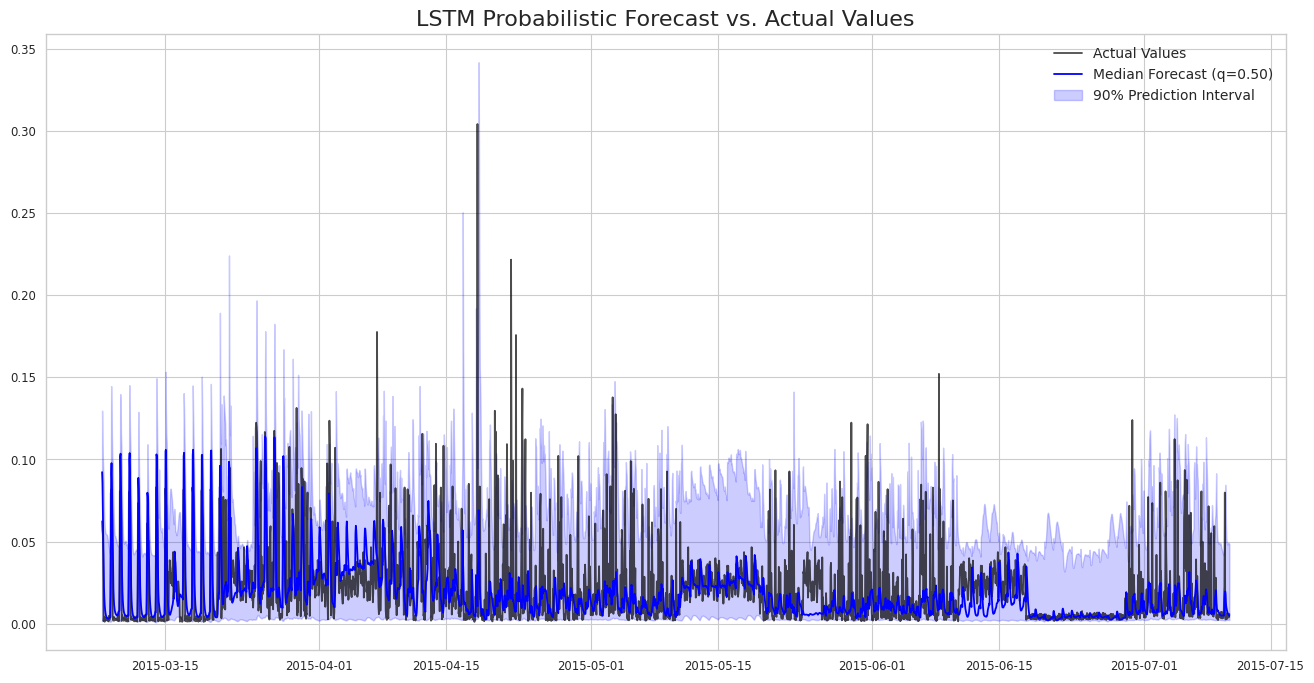

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout
# --- 1. Define the Quantile Loss Function ---
def quantile_loss(q, y_true, y_pred):
    error = tf.subtract(y_true, y_pred)
    loss = tf.reduce_mean(tf.maximum(q * error, (q - 1) * error))
    return loss

# --- 2. Define and Train a Model for each Quantile ---
quantiles = [0.05, 0.50, 0.95] # 5th, 50th (median), and 95th percentiles
predictions = {}

for q in quantiles:
    print(f"\n--- Training model for quantile: {q} ---")

    # Create a new instance of the model for each quantile
    model = Sequential()
    model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(LOOKBACK, X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=HORIZON))

    # Compile the model with the custom quantile loss
    model.compile(optimizer='adam', loss=lambda y_true, y_pred: quantile_loss(q, y_true, y_pred))

    # Train the model
    # Instantiate EarlyStopping here
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              epochs=50,
              batch_size=32,
              validation_data=(X_test, y_test),
              callbacks=[early_stopping], # Pass the instance here
              verbose=0) # verbose=1 to see output


    # Make and store predictions
    predictions[q] = model.predict(X_test)

# --- 3. Visualize the Probabilistic Forecast ---
plt.figure(figsize=(16, 8))
# Plot the actual values
plt.plot(test_df.index[LOOKBACK+HORIZON-1:], y_test, label='Actual Values', color='black', alpha=0.7)

# Plot the median (50th percentile) forecast
plt.plot(test_df.index[LOOKBACK+HORIZON-1:], predictions[0.50], label='Median Forecast (q=0.50)', color='blue')

# Fill the area between the 5th and 95th percentiles for the uncertainty interval
plt.fill_between(test_df.index[LOOKBACK+HORIZON-1:],
                 predictions[0.05].flatten(),
                 predictions[0.95].flatten(),
                 color='blue', alpha=0.2, label='90% Prediction Interval')

plt.title('LSTM Probabilistic Forecast vs. Actual Values', fontsize=16)
plt.legend()
plt.show()

In [ ]:
# --- Quantify the Probabilistic Forecast ---

# We need the y_test array from the LSTM preprocessing step
# It should be a 2D array of shape (n_samples, 1)
y_test_flat = y_test.flatten()

# Get the lower and upper bound predictions
lower_bound = predictions[0.05].flatten()
upper_bound = predictions[0.95].flatten()

# 1. Calculate Prediction Interval Coverage
is_inside_interval = (y_test_flat >= lower_bound) & (y_test_flat <= upper_bound)
coverage = np.mean(is_inside_interval) * 100

print(f"Prediction Interval Coverage: {coverage:.2f}% (Target: 90%)")


# 2. Calculate Average Quantile Score
# We'll calculate the loss for each quantile and average them
loss_q05 = quantile_loss(0.05, y_test, predictions[0.05]).numpy()
loss_q50 = quantile_loss(0.50, y_test, predictions[0.50]).numpy()
loss_q95 = quantile_loss(0.95, y_test, predictions[0.95]).numpy()
average_quantile_score = (loss_q05 + loss_q50 + loss_q95) / 3

print(f"Average Quantile Score: {average_quantile_score:.4f} (Lower is better)")

Prediction Interval Coverage: 88.81% (Target: 90%)
Average Quantile Score: 0.0035 (Lower is better)


In [ ]:
# --- 1. Inverse-Scale the LSTM Predictions ---
# 'predictions' is the dictionary from the LSTM training step.
# 'scaler' is the loaded MinMaxScaler object.
# 'y_test_inversed' is the true data on the original scale.

predictions_inversed = {}
n_scaler_features = scaler.n_features_in_

for q, preds_scaled in predictions.items():
    dummy_array = np.zeros((len(preds_scaled), n_scaler_features))
    dummy_array[:, 0] = preds_scaled.flatten()
    # Store the inverse-scaled predictions in the new dictionary
    predictions_inversed[q] = scaler.inverse_transform(dummy_array)[:, 0]

print("--- Calculating LSTM Metrics on Original Scale ---")

# --- 2. Recalculate the Average Quantile Score ---
loss_q05 = quantile_loss(0.05, y_test, predictions[0.05]).numpy()
loss_q50 = quantile_loss(0.50, y_test, predictions[0.50]).numpy()
loss_q95 = quantile_loss(0.95, y_test, predictions[0.95]).numpy()
avg_score_lstm = (loss_q05 + loss_q50 + loss_q95) / 3

print(f"Average Quantile Score: {average_quantile_score:.4f} (Lower is better)")

print(f"\nCorrected Average Quantile Score for LSTM: {avg_score_lstm:.4f}")


--- Calculating LSTM Metrics on Original Scale ---
Average Quantile Score: 0.0035 (Lower is better)

Corrected Average Quantile Score for LSTM: 0.0035
Average Quantile Score for TFT: 84.9520


In [ ]:


# --- 1. Isolate the Median Forecast ---
# 'predictions' is the dictionary from the previous step containing the quantile forecasts
median_predictions_scaled = predictions[0.50]

# --- 2. Inverse Scale the Median Forecast ---
# We use the same dummy array technique as before to scale the predictions back
# to their original units (e.g., Watts).
n_scaler_features = scaler.n_features_in_

dummy_array_preds = np.zeros((len(median_predictions_scaled), n_scaler_features))
dummy_array_preds[:, 0] = median_predictions_scaled.flatten()
median_predictions = scaler.inverse_transform(dummy_array_preds)[:, 0]

# 'y_test_inversed' should already be available from your previous LSTM evaluation.
# If not, you can recreate it:
# dummy_array_actuals = np.zeros((len(y_test), n_scaler_features))
# dummy_array_actuals[:, 0] = y_test.flatten()
# y_test_inversed = scaler.inverse_transform(dummy_array_actuals)[:, 0]

# --- 3. Calculate RMSE and MAE ---
rmse_prob = np.sqrt(mean_squared_error(y_test_inversed, median_predictions))
mae_prob = mean_absolute_error(y_test_inversed, median_predictions)

print("--- Point Forecast Metrics for Probabilistic LSTM ---")
print(f"RMSE (based on median forecast): {rmse_prob:.4f}")
print(f"MAE (based on median forecast): {mae_prob:.4f}")

--- Point Forecast Metrics for Probabilistic LSTM ---
RMSE (based on median forecast): 517.4707
MAE (based on median forecast): 295.8569


#TFT with darts

/usr/local/lib/python3.12/dist-packages/darts/timeseries.py:5108: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_times = resampled_times.asfreq(freq)
/usr/local/lib/python3.12/dist-packages/darts/timeseries.py:5108: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_times = resampled_times.asfreq(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train


--- Training TFT Model ---


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.014


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.012


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.010


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 5 records. Best score: 0.010. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--- Making Probabilistic Forecast ---


Predicting: |          | 0/? [00:00<?, ?it/s]

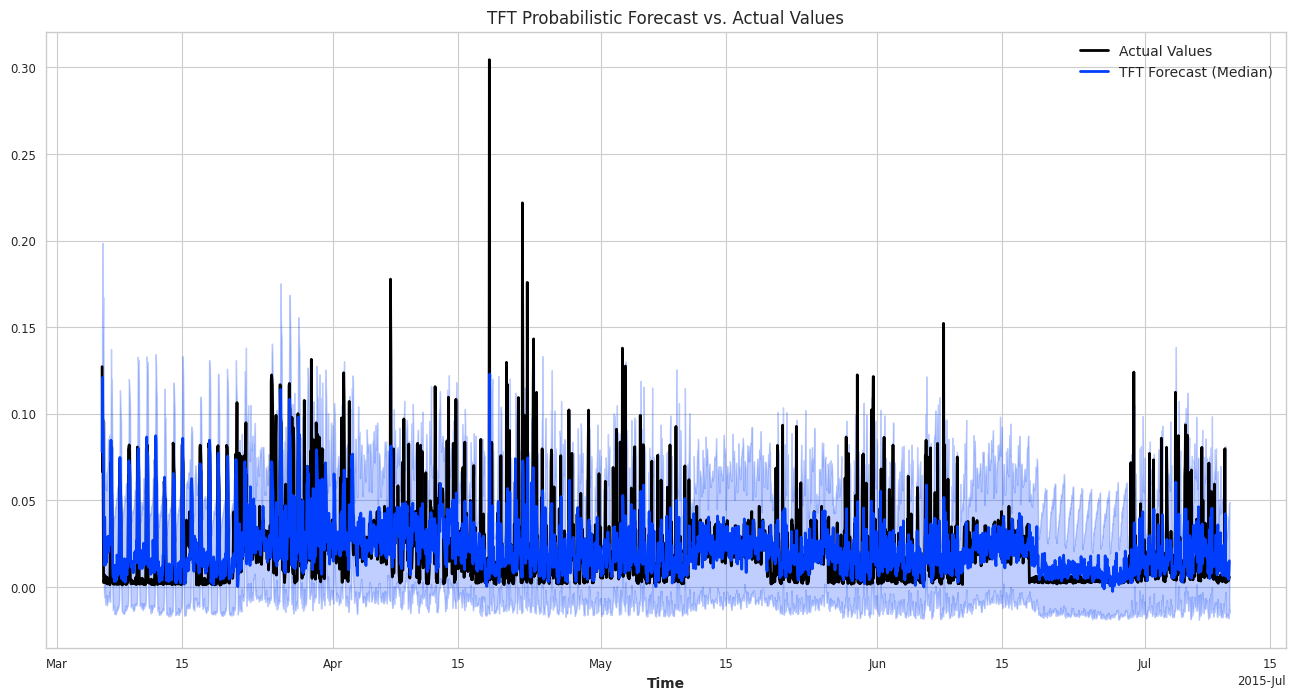

In [ ]:

from darts import TimeSeries
from darts.models import TFTModel
from darts.utils.likelihood_models import QuantileRegression
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
# --- 2. Prepare Data for Darts ---
# Darts uses its own 'TimeSeries' object.

# Create the target series (the 'Aggregate' column)
target_series = TimeSeries.from_series(df_processed['Aggregate'], freq='H')

# Create the covariates series (all your features)
# These are the features that will help the model predict the future
covariates = TimeSeries.from_dataframe(df_processed[features], freq='H')

# Split into training and validation sets
train_target, val_target = target_series.split_before(split_point)
train_covs, val_covs = covariates.split_before(split_point)


# --- 2. Create the EarlyStopping callback instance ---

my_stopper = EarlyStopping(
    monitor="val_loss",  # The metric to monitor
    patience=5,          # Number of epochs to wait for improvement
    min_delta=0.001,     # Minimum change to be considered an improvement
    mode='min',          # 'min' means we want to minimize the monitored metric
    verbose=True
)

# Create a dictionary of PyTorch Lightning trainer arguments that includes our stopper
pl_trainer_kwargs = {
    "callbacks": [my_stopper]
}


# --- 3. Instantiate and Train the TFT Model ---
# The model takes many parameters; these are some of the most important.
# It's trained to predict the 5th, 50th, and 95th quantiles directly.

tft_model = TFTModel(
    input_chunk_length=48,     # How many past hours the model sees
    output_chunk_length=24,    # How many hours it predicts into the future at once
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=32,
    n_epochs=50,
    pl_trainer_kwargs=pl_trainer_kwargs,
    likelihood=QuantileRegression([0.05, 0.5, 0.95]), # Natively probabilistic!
    random_state=42,
)

print("\n--- Training TFT Model ---")
tft_model.fit(train_target, future_covariates=train_covs, verbose=True,
                                     val_series=val_target,            # <--- Provide the validation target series
                                    val_future_covariates=val_covs)  # <--- Provide the validation covariates)


# --- 4. Make a Probabilistic Forecast ---
print("\n--- Making Probabilistic Forecast ---")
tft_predictions = tft_model.predict(n=len(val_target),
                                    future_covariates=covariates,
                                    num_samples=100) # num_samples is needed for probabilistic forecasts

# Darts makes it easy to plot
plt.figure(figsize=(16, 8))
val_target.plot(label='Actual Values')
tft_predictions.plot(label='TFT Forecast (Median)')
plt.title('TFT Probabilistic Forecast vs. Actual Values')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Helper Functions (same as before) ---

def calculate_coverage(y_true, lower_bound, upper_bound):
    is_inside = (y_true >= lower_bound) & (y_true <= upper_bound)
    coverage = np.mean(is_inside) * 100
    return coverage

def calculate_quantile_loss(q, y_true, y_pred):
    error = y_true - y_pred
    loss = np.mean(np.maximum(q * error, (q - 1) * error))
    return loss

def calculate_avg_quantile_score(y_true, predictions_dict):
    total_loss = 0
    quantiles = sorted(predictions_dict.keys())
    for q in quantiles:
        loss = calculate_quantile_loss(q, y_true, predictions_dict[q])
        total_loss += loss
        print(f"  - Score for q={q:.2f}: {loss:.4f}")
    return total_loss / len(quantiles)

# --- 1. Extract Data from Darts Objects (Corrected) ---
# 'val_target' and 'tft_predictions' are your TimeSeries objects from Darts

# Extract the NumPy array of true values
y_true_scaled = val_target.values().flatten()

# Extract the predicted quantiles using the .quantile() method
# This returns a new TimeSeries object for each quantile
lower_bound_series = tft_predictions.quantile(0.05)
median_series = tft_predictions.quantile(0.50)
upper_bound_series = tft_predictions.quantile(0.95)

# Now, extract the NumPy arrays from these new TimeSeries objects
lower_bound_scaled = lower_bound_series.values().flatten()
median_scaled = median_series.values().flatten()
upper_bound_scaled = upper_bound_series.values().flatten()


# --- 2. Inverse Scale All Values ---
# 'scaler' is the MinMaxScaler object you loaded earlier
n_scaler_features = scaler.n_features_in_

def inverse_scale_column(data_scaled, num_features, scaler_obj):
    dummy_array = np.zeros((len(data_scaled), num_features))
    dummy_array[:, 0] = data_scaled.flatten()
    return scaler_obj.inverse_transform(dummy_array)[:, 0]

# Apply the inverse scaling
y_true_inversed = inverse_scale_column(y_true_scaled, n_scaler_features, scaler)
lower_bound_inversed = inverse_scale_column(lower_bound_scaled, n_scaler_features, scaler)
median_inversed = inverse_scale_column(median_scaled, n_scaler_features, scaler)
upper_bound_inversed = inverse_scale_column(upper_bound_scaled, n_scaler_features, scaler)


# --- 3. Calculate Final Metrics ---
print("--- Probabilistic Metrics for TFT Model ---")

# Calculate Prediction Interval Coverage
coverage = calculate_coverage(y_true_inversed, lower_bound_inversed, upper_bound_inversed)
print(f"Prediction Interval Coverage: {coverage:.2f}% (Target: 90%)")

# Calculate Average Quantile Score
predictions_inversed = {
    0.05: lower_bound_inversed,
    0.50: median_inversed,
    0.95: upper_bound_inversed
}
avg_score = calculate_avg_quantile_score(y_true_inversed, predictions_inversed)
print(f"\nAverage Quantile Score: {avg_score:.4f} (Lower is better)")

# Calculate RMSE/MAE for the median forecast
rmse_tft = np.sqrt(mean_squared_error(y_true_inversed, median_inversed))
mae_tft = mean_absolute_error(y_true_inversed, median_inversed)
print(f"\nRMSE (based on median forecast): {rmse_tft:.4f}")
print(f"MAE (based on median forecast): {mae_tft:.4f}")

--- Probabilistic Metrics for TFT Model ---
Prediction Interval Coverage: 95.85% (Target: 90%)
  - Score for q=0.05: 36.0686
  - Score for q=0.50: 147.9441
  - Score for q=0.95: 70.8432

Average Quantile Score: 84.9520 (Lower is better)

RMSE (based on median forecast): 481.9402
MAE (based on median forecast): 295.8882


Rescaling all evaluation metric to same scale to compare

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults # Import SARIMAX and SARIMAXResults

# --- A. Setup ---
# 1. Load your fitted scaler (you should have this file saved)
scaler_path = '/content/drive/MyDrive/Refit_project/preprocessing/scaler.gz'
scaler = joblib.load(scaler_path)
n_scaler_features = scaler.n_features_in_

# 2. Get the TRUE unscaled values (y_test_inversed)
# (Assuming 'y_test' is your scaled target array from the LSTM data prep)
dummy_array_actuals = np.zeros((len(y_test), n_scaler_features))
dummy_array_actuals[:, 0] = y_test.values.flatten() # Access the numpy array using .values
y_test_inversed = scaler.inverse_transform(dummy_array_actuals)[:, 0]

# 3. Define the inverse-scale helper function
def inverse_scale_column(data_scaled, num_features, scaler_obj):
    dummy_array = np.zeros((len(data_scaled), num_features))
    dummy_array[:, 0] = data_scaled.flatten()
    return scaler_obj.inverse_transform(dummy_array)[:, 0]

# --- B. Re-evaluate LightGBM & XGBoost ---
# (Assuming 'X_test' is your 2D feature array and models are loaded)
# lgb_model = joblib.load(...)
# xgb_model = joblib.load(...)

# 1. Get SCALED predictions
lgb_preds_scaled = lgb_model.predict(X_test)
xgb_preds_scaled = xgb_model.predict(X_test)

# 2. Inverse-scale the predictions
lgb_preds_unscaled = inverse_scale_column(lgb_preds_scaled, n_scaler_features, scaler)
xgb_preds_unscaled = inverse_scale_column(xgb_preds_scaled, n_scaler_features, scaler)

# 3. Calculate UNSCALED metrics
rmse_lgb = np.sqrt(mean_squared_error(y_test_inversed, lgb_preds_unscaled))
mae_lgb = mean_absolute_error(y_test_inversed, lgb_preds_unscaled)
rmse_xgb = np.sqrt(mean_squared_error(y_test_inversed, xgb_preds_unscaled))
mae_xgb = mean_absolute_error(y_test_inversed, xgb_preds_unscaled)

print(f"--- Unscaled LightGBM ---")
print(f"RMSE: {rmse_lgb:.4f}")
print(f"MAE: {mae_lgb:.4f}")
print(f"--- Unscaled XGBoost ---")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")

# --- C. Re-evaluate Naive & SARIMA ---
# (Assuming 'valid_actuals' and 'naive_predictions' are already calculated Series)

# Ensure actuals and predictions are aligned and drop NaNs from naive_predictions
aligned_actuals_naive = valid_actuals.dropna()
aligned_predictions_naive = naive_predictions.loc[aligned_actuals_naive.index].dropna() # Align by index and drop any remaining NaNs

naive_preds_unscaled = inverse_scale_column(aligned_predictions_naive.values, n_scaler_features, scaler)
naive_actuals_unscaled = inverse_scale_column(aligned_actuals_naive.values, n_scaler_features, scaler)

# Make sure lengths are consistent after alignment and dropping NaNs
if len(naive_actuals_unscaled) == len(naive_preds_unscaled):
    rmse_naive = np.sqrt(mean_squared_error(naive_actuals_unscaled, naive_preds_unscaled))
    mae_naive = mean_absolute_error(naive_actuals_unscaled, naive_preds_unscaled)

    print(f"--- Unscaled Naive Forecast ---")
    print(f"RMSE: {rmse_naive:.4f}")
    print(f"MAE: {mae_naive:.4f}")
else:
    print("Naive Forecast: Length mismatch between actuals and predictions after alignment.")
    print(f"Actuals length: {len(naive_actuals_unscaled)}, Predictions length: {len(naive_preds_unscaled)}")


# Load the SARIMA model and make predictions
sarima_model_path = os.path.join(save_dir, "sarima_model.pkl")


# We need to provide the future exogenous variables
exog_cols = ['hour', 'dayofweek', 'month', 'is_weekend']
sarima_predictions = sarima_results.predict(start=test_data.index[0],
                                            end=test_data.index[-1],
                                            exog=test_data[exog_cols],
                                            )

# Assuming 'sarima_predictions' is your scaled SARIMA predictions (it's a Series)
# Align SARIMA actuals with predictions based on the SARIMA predictions index
sarima_actuals_scaled = test_data[target_col].loc[sarima_predictions.index]

sarima_preds_unscaled = inverse_scale_column(sarima_predictions.values, n_scaler_features, scaler)
sarima_actuals_unscaled = inverse_scale_column(sarima_actuals_scaled.values, n_scaler_features, scaler)

if len(sarima_actuals_unscaled) == len(sarima_preds_unscaled):
    rmse_sarima = np.sqrt(mean_squared_error(sarima_actuals_unscaled, sarima_preds_unscaled))
    mae_sarima = mean_absolute_error(sarima_actuals_unscaled, sarima_preds_unscaled)

    print(f"--- Unscaled SARIMA ---")
    print(f"RMSE: {rmse_sarima:.4f}")
    print(f"MAE: {mae_sarima:.4f}")
else:
     print("SARIMA Forecast: Length mismatch between actuals and predictions after alignment.")
     print(f"Actuals length: {len(sarima_actuals_unscaled)}, Predictions length: {len(sarima_preds_unscaled)}")

--- Unscaled LightGBM ---
RMSE: 454.6866
MAE: 258.0953
--- Unscaled XGBoost ---
RMSE: 452.9195
MAE: 260.6795
--- Unscaled Naive Forecast ---
RMSE: 623.2680
MAE: 327.6460
--- Unscaled SARIMA ---
RMSE: 2815.9667
MAE: 2565.0850
